In [75]:
%pylab inline

import requests
import pandas as pd
import io
from pytrends.request import TrendReq

Populating the interactive namespace from numpy and matplotlib


In [23]:
df = pd.read_csv('DF.csv', sep=';')

In [24]:
df.head()

,DateWeek,Greecearrivals,italyarrivals,googletranslateAntalya,busAntalya,googlemapsAntalya,googleearthAntalya,weatherAntalya,AegeanAntalya,campAntalya,...,ViberMuglaProvince,SkypeMuglaProvince,imoMuglaProvince,youtubeMuglaProvince,tourismMuglaProvince,GooglePlayMuglaProvince,LesbosMuglaProvince,KosMuglaProvince,PortMuglaProvince,WhatsappMuglaProvince
0,23/08/2015,26395,NaN,93,75,89,83,21,39,25,...,21,48,61,88,33,66,15,31,20,61
1,30/08/2015,14707,NaN,81,73,79,64,19,20,70,...,54,58,0,86,57,94,31,32,54,41
2,06/09/2015,22854,NaN,75,65,80,97,35,39,60,...,65,50,32,77,23,60,16,22,33,49
3,13/09/2015,35195,NaN,67,92,68,66,45,29,35,...,32,50,0,84,0,91,16,17,54,49
4,20/09/2015,36589,NaN,68,86,71,51,100,92,47,...,100,100,0,91,53,100,54,23,48,48


In [25]:
df['DateWeek']

0      23/08/2015
1      30/08/2015
2      06/09/2015
3      13/09/2015
4      20/09/2015
          ...    
106    03/09/2017
107    10/09/2017
108    17/09/2017
109    24/09/2017
110    01/10/2017
Name: DateWeek, Length: 111, dtype: object

In [26]:
data = requests.get('https://data2.unhcr.org/api/population/get/timeseries?widget_id=171273&geo_id=160&population_group=5121&frequency=day&fromDate=1900-01-01').json()

In [27]:
dfe = pd.DataFrame(data['data']['timeseries'])

In [28]:
dfe['date'] = dfe['data_date'].apply(lambda x: pd.to_datetime(x))

In [29]:
dfe = dfe.sort_values('date')
dfe['EthiopiaArrivals'] = dfe['individuals']

In [30]:
dfe = dfe[['date','EthiopiaArrivals']].set_index('date')

In [31]:
dfe

,EthiopiaArrivals
date,
2017-02-28,9834
2017-03-31,20515
2017-04-30,10797
2017-05-31,4876
2017-06-30,6184
2017-07-31,3311
2017-08-31,9288
2017-09-30,27144
2017-10-31,3229


In [32]:
def get_trends(term):
    s=requests.get(base_url.format(term)).content
    c=pd.read_csv(io.StringIO(s.decode('utf-8')),skiprows=1)
    return c

In [33]:
terms = ['hotels',
        'bus tickets Ethiopia',
        'Ethiopia hotels',
        'trains',
        'tickets prices',
        'Ethiopia news'
        'Ethiopia South Sudan Transportation',
        'transportation',
        'safety Ethiopia',
        'Ethiopia weather',
        'Ethiopia currency',
        'Ethiopia South Sudan railway stations',
        'Ethiopia Nature',
        'Freedom',
        'work',
        'education',
        'children',
        'education', 
        'family reunion']

terms_sm = list(set(['hotels',
        'bus',
        'Addis',
        'border',
        'migrate',
        'refugee',
        'trains',
        'tickets',
        'prices',
        'transportation',
        'safety',
        'Ethiopia',
        'currency',
        'railway',
        'freedom',
        'work',
        'children',
        'education', 
        'reunion']))

## Term Translation

Using: 
    
```
google-api-core==1.21.0
google-auth==1.18.0
google-cloud-core==1.3.0
google-cloud-translate==2.0.1
```

In [15]:
import os
from google.cloud import translate_v2 as translate

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'world-modelers-268718-3c82e082c7de.json'

In [18]:
sudanese = 'su'
somali = 'so'

In [34]:
su_terms = []
so_terms = []

# Sudanese
for term in terms_sm:
    client = translate.Client(target_language=sudanese)
    su_terms.append(client.translate(term)['translatedText'])
    
# Somali
for term in terms_sm:
    client = translate.Client(target_language=somali)
    so_terms.append(client.translate(term)['translatedText'])

In [36]:
print(su_terms)
print(so_terms)

['kasalametan', 'tikét', 'wates', 'karéta', 'beus', 'pindah', 'gawe', 'pangungsi', 'angkot', 'reuni', 'kabebasan', 'pendidikan', 'tukeur', 'Étiopia', 'barudak', 'karéta', 'hotél', 'Addis', 'harga']
['amniga', 'tigidhada', 'xadka', 'wadada tareenka', 'bas', 'haajiraan', 'shaqada', 'qaxooti', 'gaadiid', 'isukeenid', 'xorriyadda', 'waxbarasho', 'lacag', 'Itoobiya', 'carruurta', 'tareenada', 'hoteelo', 'Addis', 'qiimaha']


### Obtain Trends

In [44]:
south_sudan = 'SS'
somalia = 'SO'

In [45]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [46]:
trend_dfs = []

In [47]:
# South Sudan Trends
pytrend = TrendReq(hl='en-US', tz=360, geo=south_sudan)
for term_list in chunks(su_terms,5):
    pytrend.build_payload(kw_list=term_list)
    trend_df = pytrend.interest_over_time()
    trend_dfs.append(trend_df)
    
pytrend = TrendReq(hl='en-US', tz=360, geo=somalia)
for term_list in chunks(so_terms,5):
    pytrend.build_payload(kw_list=term_list)
    trend_df = pytrend.interest_over_time()
    trend_dfs.append(trend_df)    

In [60]:
trend_dfs[0].shape

(0, 0)

In [62]:
count = 0
for d in trend_dfs:
    if d.shape != (0,0):
        if count == 0:
            d_ = d.drop(columns=['isPartial'])
        else:
            d_ = d_.join(d.drop(columns=['isPartial']), rsuffix='_SO')
        count += 1

In [66]:
d_.head()

,karéta,hotél,Addis,harga,amniga,tigidhada,xadka,wadada tareenka,bas,haajiraan,...,isukeenid,xorriyadda,waxbarasho,lacag,Itoobiya,carruurta,tareenada,hoteelo,Addis_SO,qiimaha
date,,,,,,,,,,,,,,,,,,,,,
2015-07-05,0,0,25,0,54,0,56,0,56,0,...,0,0,0,0,31,0,0,0,40,20
2015-07-12,0,0,0,0,0,0,0,0,0,0,...,0,0,20,0,0,0,0,0,39,20
2015-07-19,0,0,23,0,0,0,0,0,100,0,...,0,0,19,0,19,0,0,0,0,0
2015-07-26,0,0,49,0,49,0,0,0,72,0,...,0,0,0,18,28,0,0,0,18,0
2015-08-02,0,0,31,0,0,0,0,0,0,0,...,0,0,20,0,20,0,0,0,28,0


In [64]:
d_.to_csv('Migration_GTrends.csv')

## Join Refugees + Trends

In [67]:
dfe_resample = dfe.resample('1M').sum()
gtrends_resample = d_.resample('1M').mean()

In [70]:
mig_eth = dfe_resample.join(gtrends_resample)

In [71]:
mig_eth.head()

,EthiopiaArrivals,karéta,hotél,Addis,harga,amniga,tigidhada,xadka,wadada tareenka,bas,...,isukeenid,xorriyadda,waxbarasho,lacag,Itoobiya,carruurta,tareenada,hoteelo,Addis_SO,qiimaha
date,,,,,,,,,,,,,,,,,,,,,
2017-02-28,9834,0.0,0.0,28.50,0.0,13.25,0.0,0.00,0.0,33.50,...,0.0,0.0,15.25,14.00,19.00,0.0,0.0,0.0,12.5,11.00
2017-03-31,20515,0.0,0.0,30.50,0.0,12.75,0.0,12.75,0.0,24.75,...,0.0,0.0,15.50,15.50,16.75,0.0,0.0,0.0,12.5,7.00
2017-04-30,10797,0.0,0.0,14.80,0.0,22.60,0.0,10.20,0.0,34.20,...,0.0,0.0,16.20,12.80,17.40,0.0,0.0,0.0,9.0,8.80
2017-05-31,4876,0.0,0.0,19.25,0.0,21.00,0.0,0.00,0.0,23.50,...,0.0,0.0,5.50,7.75,19.00,0.0,0.0,0.0,18.0,8.00
2017-06-30,6184,0.0,0.0,25.75,0.0,29.50,0.0,0.00,0.0,7.50,...,0.0,0.0,12.75,18.00,18.50,0.0,0.0,0.0,10.0,12.75


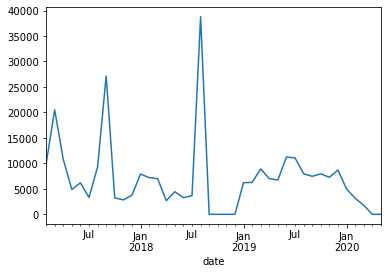

In [80]:
mig_eth['EthiopiaArrivals'].plot(kind='line')

In [72]:
mig_eth.to_csv('Migration_GTrends.csv')